Type: Learning Project \
Author: Yash K

#### About: Sentiment Analysis
Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication. It refers to the application of natural language processing, computational linguistics, and text analysis to identify and classify subjective opinions in source documents.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example- wonderful, elegant, astonishing; and negative words, eg. horrible, disgusting, poor.

Data set: 
Movie reviews dataset from IMDB.
Text -  contains the criticism
Label - 0s (negative) and 1s (positive)

In [39]:
import nltk
# ^^^ pyforest auto-imports - don't write above this line
#imports
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#basics
import math
import random
import string
import re
from tqdm.notebook import tqdm #to visualize loops as progress bars

#data
import numpy as np
import pandas as pd
from collections import defaultdict

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#NLP
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
#read data
data = pd.read_csv("./sentiment-analysis-data/Train.csv")
test = pd.read_csv("./sentiment-analysis-data/Test.csv")

In [41]:
train.shape

(40000, 2)

In [42]:
test.shape

(5000, 2)

In [43]:
train.iloc[0].text

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

###### Visualization

In [44]:
fig=plt.figure(figsize=(5,5))
colors=["green",'red']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]

<Figure size 360x360 with 0 Axes>

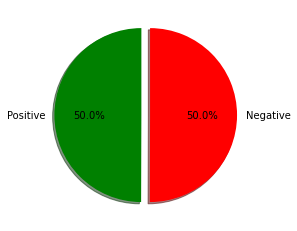

In [45]:
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 90,
                 explode=(0, 0.1))

###### Preprocessing

In [46]:
#use regex to remove html tags etc. and stuff
#we will put emojis like :), :( ,:/ in the end 
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) #use regex to substitute
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emojis).replace('-', '') #\W matches any non-word character [^a-zA-Z0-9]
    return text

In [47]:
data['text']=data['text'].apply(preprocessor)

In [49]:
#function to do stemming of text using porter stemmer
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

###### Visualizing positive and negative words using word cloud

In [64]:
#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

positive_data = data[data['label']==1].text
negative_data = data[data['label']==0].text

In [54]:
from wordcloud import WordCloud
def wordCloud_draw(data, color='White'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split() if (word!='movie' and word!='film')])
    wordCloud = WordCloud(stopwords=stop, 
                         background_color=color, 
                         width = 2500, 
                         height = 2000).generate(cleaned_word)
    plt.figure(1, figsize=(10,7))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

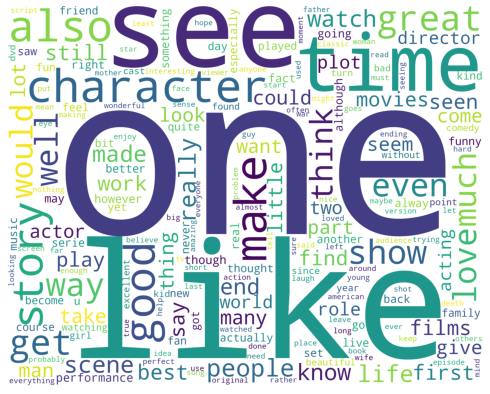

In [56]:
#positive word cloud
wordCloud_draw(positive_data, 'white')

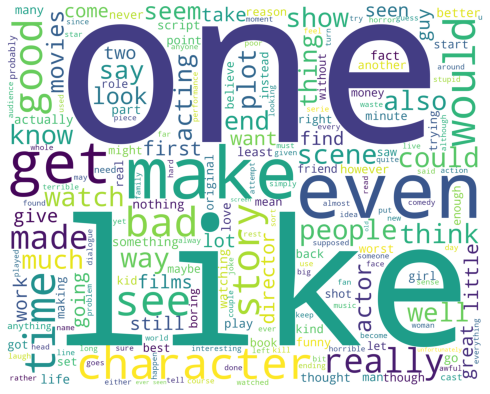

In [57]:
#negative word cloud
wordCloud_draw(negative_data, 'white')

###### Apply sentiment analysis

In [62]:
#use tf-idf vectorizer to convert text into feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)

In [63]:
X=tfidf.fit_transform(data.text)
y=data.label.values

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.5,shuffle=False)

In [70]:
#use logistic regression model 
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=6, scoring='accuracy',random_state=0,n_jobs=-1,verbose=0,max_iter=500).fit(X_train, y_train)

In [71]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
print('Model accuracy:', accuracy_score(y_test, y_pred))

Model accuracy: 0.89055
